## ***DS-620 Data Visualization Final Project***
<br>

***Project Contributors:*** Supriya Teegala, Manideep Lenkalapally, Mohamad Sahil & Kuzi Rusere<br><br>
***Business Proposition:*** Providing a Retail Business with a strategy which helps improve their product sales, inventory management, and customer retention, hence improving the profitability of the business. <br>
<br><br>
***Methodology:*** Data Mining, Analysis and Visualization of Retail Sales Data. This will be done mainly using Market Basket Analysis (MBA), which aims to find relationship and establishing pattens within the retail sales data or purchases. MBA looks for relationships or associations among entities and objects that frequently appear together (for example in a retail sales dataset), such as the collection of items in a shopper’s cart.

***Data Collection and Preparation***


In [40]:
#importing the relevent libraries and modules 
import pandas as pd
import plotly as py 
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import calendar
from wordcloud import WordCloud
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [87]:
#we are going to import the data into a pandas dataframe 
def data_loading():
    df = pd.read_excel("/Users/kkrusere/Desktop/Desktop_1/Online Retail.xlsx")
    
    return df

df = data_loading()

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.<br>
The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.<br><br>
***InvoiceNo:*** A number assigned to each transaction <br>
***StockCode:*** Product code <br>
***Description:*** Product name <br>
***Quantity:*** Number of products purchased for each transaction <br>
***InvoiceDate:*** Timestamp for each transaction <br>
***UnitPrice:*** Product price per unit <br>
***CustomerID:*** Unique identifier each customer <br>
***Country:*** Country name <br>

In [3]:
def wordcloud_of_Description(df, title):
    """
    This fuction creates a word cloud
    inputs a data frame converts it to tuples and uses the input 'title' as the title of the word cloud
    """
    plt.rcParams["figure.figsize"] = (20,20)
    tuples = [tuple(x) for x in df.values]
    wordcloud = WordCloud().generate_from_frequencies(dict(tuples))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

In [4]:
def checking(x):
    """
    This is for checking if a value was a canceled order due to being less than 0
    It returns a boolean True if it's cancelled order and False if not 
    """
    if x <= 0:
        return True
    else:
        return False

In [88]:
def data_cleaning(df):
    #we are going to convert the InvoiceDate column into pandas datetime formart
    df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x : pd.to_datetime(str(x)))
    #after that we are going to split the InvoiceDate into date and time
    df['Dates'] = df['InvoiceDate'].dt.date
    df['Time'] = df['InvoiceDate'].dt.time
    df["Hour"] = df['InvoiceDate'].dt.hour
    #we will add the day of the week to the dataframe 
    df['Day of Week'] = df['InvoiceDate'].dt.day_name()
    #we will create a time of the day column
    df['Time of Day']=pd.cut(df['InvoiceDate'].dt.hour,[0,6,12,18,23],labels=['Night','Morning','Afternoon','Evening'],include_lowest=True)
    #now we split the date into year month and day 
    df[['Year','Month','Day']] = df.Dates.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
    df['Month'] = df['Month'].astype(int)
    df['Month'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])
    #we will add a Total_Price Column to the dataframe 
    df['Sales Revenue'] = df['UnitPrice'] * df['Quantity']
    #we are going to replace the null values in the CustomerID with Guest_Cusstomer
    #the customers that do not have customer id are guest customers 
    df["CustomerID"].fillna("Guest_Cusstomer", inplace = True)
    #we are going to change the data type of the CustomerID
    df['CustomerID'] = df['CustomerID'].astype(str)
    #we will drop the duplicates
    df.drop_duplicates(inplace = True)
    #creating a column that keeps track of the cancelled orders 
    df["IsCancelled"] = df['UnitPrice'].apply(lambda x: checking(x))
    #We are going to drop the nan from the Description column
    df.dropna(subset = ['Description'], inplace= True)
    
    df.Description = df.Description.str.lower()

    return df


In [89]:
df = data_cleaning(df)

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Dates,Time,Day of Week,Time of Day,Year,Month,Day,Sales Revenue,IsCancelled
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,Morning,2010,December,01,15.30,False
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,Morning,2010,December,01,20.34,False
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,Morning,2010,December,01,22.00,False
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,Morning,2010,December,01,20.34,False
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,Wednesday,Morning,2010,December,01,20.34,False


## ***Exploratory Data Analysis***


In [113]:
Country_Data = df.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
fig = px.bar(Country_Data, x= "InvoiceNo", y='Country', title= "Top 10 Number of orders per country")
fig.show()

In [114]:
df_temp = df[df['Country'] != "United Kingdom"]
Country_Data = df_temp.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
fig = px.bar(Country_Data, x= "InvoiceNo", y='Country', title= "Top 10 Number of orders per country")
fig.show()

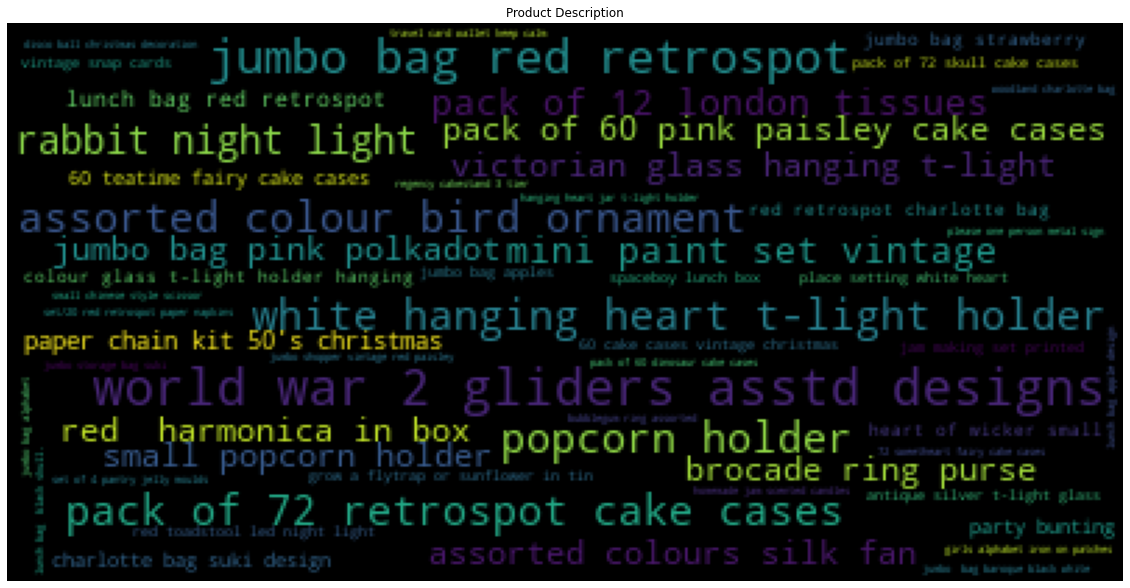

In [153]:
#we can create a word cloud of the product descriptions
y = pd.DataFrame(df.groupby('Description')['Quantity'].sum()).reset_index()
title = "Product Description"
wordcloud_of_Description(y, title)

In [188]:
Monthly_Sales = pd.DataFrame(df.groupby("InvoiceDate").sum().resample("M").sum()["Sales Revenue"])
Weekly_Sales = pd.DataFrame(df.groupby("InvoiceDate").sum().resample("W").sum()["Sales Revenue"])
Daily_Sales = pd.DataFrame(df.groupby("InvoiceDate").sum().resample("D").sum()["Sales Revenue"])

Monthly_Sales.to_csv("Monthly_Sales.csv")
Weekly_Sales.to_csv("Weekly_Sales.csv")
Daily_Sales.to_csv("Daily_Sales.csv")

### ***Monthly Stats*** 

The below are the monthly analysis of the Sales and the Quantity of iterms sold

In [86]:
fig = px.bar(Monthly_Sales, x= Monthly_Sales.index, y='Sales Revenue')
fig.show()

In [87]:
Monthly_Sales = pd.DataFrame(df.groupby('Month')['Sales Revenue'].sum()).reset_index()
fig = px.pie(Monthly_Sales, values='Sales Revenue', names='Month', title='Percentage of Sales Per Month ')
fig.show()

In [88]:
Monthly_Quantity = pd.DataFrame(df.groupby('Month')['Quantity'].sum()).reset_index()
fig = px.bar(Monthly_Quantity, y='Quantity', x='Month', title='Quantity Sold Per Month')
fig.show()

### ***Weekly Stats*** 

The below are the weekly analysis of the Sales and the Quantity of iterms sold

In [89]:
fig = px.line(Weekly_Sales, x= Weekly_Sales.index, y='Sales Revenue', title = "A line chart of the Weekly Sales")
fig.show()

In [189]:
Weekly_Quantity = pd.DataFrame(df.groupby("InvoiceDate").sum().resample("W").sum()["Quantity"]).reset_index()
Weekly_Quantity.to_csv("Weekly_Quantity.csv")
fig = px.bar(Weekly_Quantity, x='InvoiceDate', y='Quantity', title='Quantity Sold Per Month')
fig.show()

In [91]:
fig = px.bar(Daily_Sales, x= Daily_Sales.index, y='Sales Revenue', title= "This a bar graph of the daily sales")
fig.show()

In [190]:
Daily_Sales = pd.DataFrame(df.groupby('Day of Week')['Sales Revenue'].sum()).reset_index()
Daily_Sales.to_csv("Daily_Sales2.csv")

fig = px.pie(Daily_Sales, values='Sales Revenue', names='Day of Week', title='Percentage of Sales Per day of the week')
fig.show()

In [192]:
Daily_Sales = pd.DataFrame(df.groupby('Day of Week')['Quantity'].sum()).reset_index()
Daily_Sales.to_csv("Daily_Sales4.csv")
fig = px.bar(Daily_Sales, x='Day of Week', y='Quantity', title='Quantity Sold Per day of the week')
fig.show()

In [191]:
Daily_Sales = pd.DataFrame(df.groupby('Time of Day')['Quantity'].sum()).reset_index()
Daily_Sales.to_csv("Daily_Sales3.csv")
fig = px.pie(Daily_Sales, values='Quantity', names='Time of Day', title='Quantity Sold Per time of the day')
fig.show()

In [12]:
df["Hour"] = df.InvoiceDate.dt.hour

In [24]:
#we can also look at the volume quantity sold hourly data 
Hourly_Sales = (df.groupby('Hour').sum()["Quantity"]).reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='Quantity', title='Hourly Volume of quantity sold')
fig.show()

In [25]:
Hourly_Sales.head()

,Hour,Quantity
0,6,-86
1,7,15361
2,8,157728
3,9,429395
4,10,682524


In [21]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Dates', 'Time', 'Day of Week',
       'Time of Day', 'Year', 'Month', 'Day', 'Sales Revenue', 'IsCancelled',
       'Hour'],
      dtype='object')

In [26]:
Hourly_Sales = (df.groupby('Hour').count()["InvoiceNo"]).reset_index()
fig = px.bar(Hourly_Sales, x='Hour', y='InvoiceNo', title='Hourly sale using the Invoice Numbers')
fig.show()

In [96]:
data = df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
fig = px.bar(data, x='CustomerID', y='InvoiceNo', title='Graph of top ten customer with respect to the invoice number')
fig.show()

In [97]:
temp_df = df[df["CustomerID"] != "Guest_Cusstomer"]
data = temp_df.groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
fig = px.bar(data, x='CustomerID', y='InvoiceNo', title='Graph of top ten customer with respect to the invoice number without the Guest Cusstomer')
fig.show()

***Modeling and Model Evaluation***

The five major metrics covered in Assocciation rule analysis are support, confidence, lift, leverage and conviction.

***Support:*** Percentage of orders that contain the item set. <br><br>
***Confidence:*** Given two items, X and Y, confidence measures the percentage of times that item Y is purchased, given that item X was purchased.<br><br>
***Lift:*** Unlike the confidence metric whose value may vary depending on direction [eg: confidence(X ->Y) may be different from confidence(Y ->X)], lift has no direction. This means that the lift(X,Y) is always equal to the lift(Y,X).<br><br>
***Leverage:*** Leverage measures the difference of X and Y appearing together in the data set and what would be expected if X and Y where statistically dependent. The rational in a sales setting is to find out how many more units (items X and Y together) are sold than expected from the independent sells.<br><br>
***Conviction:*** Conviction compares the probability that X appears without Y if they were dependent with the actual frequency of the appearance of X without Y. In that respect it is similar to lift (see section about lift on this page), however, it contrast to lift it is a directed measure. Furthermore, conviction is monotone in confidence and lift.

For the model we are going to Use the data where the quantity is greater than zero and the cancelled orders

In [160]:
df = df[df["IsCancelled"] == False]
df = df[df["Quantity"] > 0]


We are going to do the Market Basket Analysis (MBA) by only 3 countrie seperately:<br>
* UK
* France
* Germany 

### **Will Start with the UK**

We are going to re-order and group the Quantity column by the invoice number and the product description for the stated country.

In [161]:
#for the UK we will call this the UKbasket
UKbasket = (df[df['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [162]:
UKbasket.head(5)

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,toadstool bedside light,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
#from the above table we aare going to make that very value that is less than or equal to 0 be zero and anything else be equal to 1.
#this is called one hot encoding and we will use the buit in pandas applymap() function with a custom function as input to check the condition stated above
def encoder(num):
    if num <= 0: return 0
    if num >= 1: return 1

In [164]:
#now we encode
UKbasket = UKbasket.applymap(encoder)

In [165]:
UKbasket.head(5)

Description,4 purple flock dinner candles,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,oval wall mirror diamante,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,toadstool bedside light,...,zinc star t-light holder,zinc sweetheart soap dish,zinc sweetheart wire letter rack,zinc t-light holder star large,zinc t-light holder stars large,zinc t-light holder stars small,zinc top 2 door wooden shelf,zinc willie winkie candle stick,zinc wire kitchen organiser,zinc wire sweetheart letter tray
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The next step will be to generate the frequent itemsets that have a support of at least 10% using the MLxtend Apriori fuction which returns frequent itemsets from a one-hot DataFrame

In [170]:
frequent_itemsets = apriori(UKbasket, min_support=0.01, use_colnames=True)

In [171]:
frequent_itemsets.head()

,support,itemsets
0,0.014041,( set 2 tea towels i love london )
1,0.015151,(10 colour spaceboy pen)
2,0.013375,(12 message cards with envelopes)
3,0.018148,(12 pencil small tube woodland)
4,0.018813,(12 pencils small tube red retrospot)


In [172]:
#we then can look at the rules  of association using the MLxtend association_rules() 
#the function generates a DataFrame of association rules including the metrics 'score', 'confidence', and 'lift'
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(6 ribbons rustic charm),(dotcom postage),0.047450,0.039181,0.011210,0.236257,6.029916,0.009351,1.258040
1,(dotcom postage),(6 ribbons rustic charm),0.039181,0.047450,0.011210,0.286119,6.029916,0.009351,1.334326
2,(6 ribbons rustic charm),(jam making set printed),0.047450,0.055941,0.011987,0.252632,4.516040,0.009333,1.263178
3,(jam making set printed),(6 ribbons rustic charm),0.055941,0.047450,0.011987,0.214286,4.516040,0.009333,1.212336
4,(6 ribbons rustic charm),(jam making set with jars),0.047450,0.055441,0.010711,0.225731,4.071518,0.008080,1.219936


### ***For Germany***

In [173]:
GermanyBasket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
GermanyBasket.head()

Description,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,10 colour spaceboy pen,12 coloured party balloons,12 ivory rose peg place settings,12 message cards with envelopes,...,yuletide images gift wrap set,zinc heart t-light holder,zinc star t-light holder,zinc box sign home,zinc folkart sleigh bells,zinc heart lattice t-light holder,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small,zinc willie winkie candle stick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
#now we encode
GermanyBasket = GermanyBasket.applymap(encoder)
GermanyBasket.head()

Description,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,red spot gift bag large,set 2 tea towels i love london,spaceboy baby gift set,10 colour spaceboy pen,12 coloured party balloons,12 ivory rose peg place settings,12 message cards with envelopes,...,yuletide images gift wrap set,zinc heart t-light holder,zinc star t-light holder,zinc box sign home,zinc folkart sleigh bells,zinc heart lattice t-light holder,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small,zinc willie winkie candle stick
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
frequent_itemsets = apriori(GermanyBasket, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.010941,( 50's christmas gift bag large)
1,0.015317,( dolly girl beaker)
2,0.010941,( set 2 tea towels i love london )
3,0.010941,( spaceboy baby gift set)
4,0.024070,(10 colour spaceboy pen)


In [176]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( 50's christmas gift bag large),(postage),0.010941,0.818381,0.010941,1.000000,1.221925,0.001987,inf
1,(postage),( 50's christmas gift bag large),0.818381,0.010941,0.010941,0.013369,1.221925,0.001987,1.002461
2,( dolly girl beaker),(postage),0.015317,0.818381,0.015317,1.000000,1.221925,0.002782,inf
3,(postage),( dolly girl beaker),0.818381,0.015317,0.015317,0.018717,1.221925,0.002782,1.003464
4,( dolly girl beaker),(spaceboy beaker),0.015317,0.024070,0.013129,0.857143,35.610390,0.012760,6.831510


### ***For France***

In [177]:
FranceBasket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
FranceBasket.head()

Description,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,set 2 tea towels i love london,spaceboy baby gift set,trellis coat rack,10 colour spaceboy pen,12 coloured party balloons,12 egg house painted wood,...,wrap vintage petals design,yellow coat rack paris fashion,yellow giant garden thermometer,yellow shark helicopter,zinc star t-light holder,zinc folkart sleigh bells,zinc herb garden container,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
#now we encode
FranceBasket = FranceBasket.applymap(encoder)
FranceBasket.head()

Description,50's christmas gift bag large,dolly girl beaker,i love london mini backpack,nine drawer office tidy,set 2 tea towels i love london,spaceboy baby gift set,trellis coat rack,10 colour spaceboy pen,12 coloured party balloons,12 egg house painted wood,...,wrap vintage petals design,yellow coat rack paris fashion,yellow giant garden thermometer,yellow shark helicopter,zinc star t-light holder,zinc folkart sleigh bells,zinc herb garden container,zinc metal heart decoration,zinc t-light holder star large,zinc t-light holder stars small
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
frequent_itemsets = apriori(FranceBasket, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.022959,( dolly girl beaker)
1,0.012755,( i love london mini backpack)
2,0.017857,( set 2 tea towels i love london )
3,0.040816,( spaceboy baby gift set)
4,0.030612,(10 colour spaceboy pen)


In [180]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,( dolly girl beaker),(charlotte bag dolly girl design),0.022959,0.066327,0.012755,0.555556,8.376068,0.011232,2.100765
1,(charlotte bag dolly girl design),( dolly girl beaker),0.066327,0.022959,0.012755,0.192308,8.376068,0.011232,1.209670
2,( dolly girl beaker),(dolly girl childrens bowl),0.022959,0.045918,0.017857,0.777778,16.938272,0.016803,4.293367
3,(dolly girl childrens bowl),( dolly girl beaker),0.045918,0.022959,0.017857,0.388889,16.938272,0.016803,1.598794
4,(dolly girl childrens cup),( dolly girl beaker),0.040816,0.022959,0.015306,0.375000,16.333333,0.014369,1.563265
